## *Introduction to Neural Nets*
### *Using pretrained models with Tensorflow and Keras.*

In [11]:
import numpy as np

import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions

from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as preprocess_xception
from keras.applications.xception import decode_predictions as decode_xception

from IPython.core.display import display

In [2]:
COFFEE_FILE = "coffee_image.jpg"
COMPUTER_FILE = "computer_image.png"
CAR_FILE = "oldcar_image.jpg"

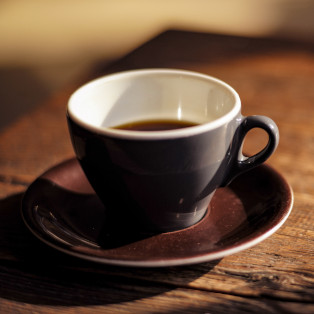

(314, 314, 3)

In [3]:
# load img
picture = load_img(COFFEE_FILE)
display(picture)

# convert image to array
picture_array = img_to_array(picture)
picture_array.shape

### *Load model: InceptionResNetV2*
#### https://keras.io/api/applications/inceptionresnetv2/

In [4]:
%%time

inception_model = InceptionResNetV2(weights="imagenet")
inception_model.graph = tf.compat.v1.get_default_graph()

# Wall time: 1min 27s

CPU times: user 10 s, sys: 530 ms, total: 10.5 s
Wall time: 9.86 s


In [5]:
# format the original image according to the models expectations
def load_img_inceptionresnetv2(file_path):
    # input expected size is 299x299
    # from docs: the input shape has to be (299, 299, 3)...
    pic = load_img(file_path, target_size=(299,299))
    # input expected dimensions=4
    expanded_pic = np.expand_dims(pic, axis=0)
    preprocessed_pic = preprocess_input(expanded_pic)
    
    return preprocessed_pic

---
### Predict the coffee image

In [6]:
# load and properly format the COFFEE FILE
input_pic = load_img_inceptionresnetv2(COFFEE_FILE)

# predict using the model
prediction = inception_model.predict(input_pic)
decode_predictions(prediction)

[[('n07920052', 'espresso', 0.8969475),
  ('n07930864', 'cup', 0.0440487),
  ('n03063599', 'coffee_mug', 0.004376422),
  ('n03297495', 'espresso_maker', 0.0010738844),
  ('n03063689', 'coffeepot', 0.00081285194)]]

---
### Predict the computer image

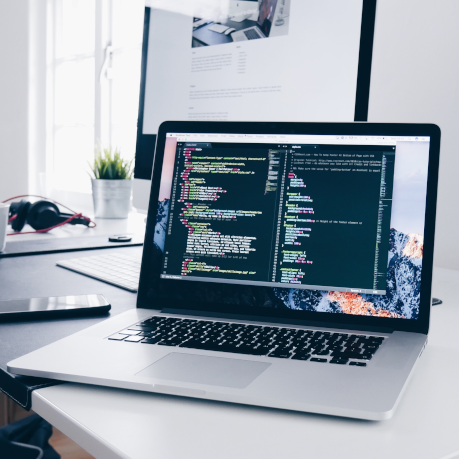

In [7]:
display(load_img(COMPUTER_FILE))

In [8]:
# load and properly format the COMPUTER FILE
input_pic2 = load_img_inceptionresnetv2(COMPUTER_FILE)

# predict using the model
prediction2 = inception_model.predict(input_pic2)
decode_predictions(prediction2)

[[('n03832673', 'notebook', 0.37765282),
  ('n03642806', 'laptop', 0.16875824),
  ('n03782006', 'monitor', 0.08867533),
  ('n03180011', 'desktop_computer', 0.072744794),
  ('n03179701', 'desk', 0.06840268)]]

---
### Predict the car image

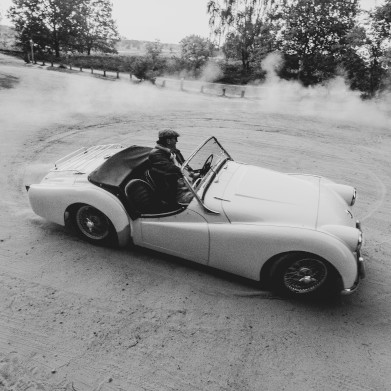

In [9]:
display(load_img(CAR_FILE))

In [10]:
# load and properly format the CAR FILE
input_pic3 = load_img_inceptionresnetv2(CAR_FILE)

# predict using the model
prediction3 = inception_model.predict(input_pic3)
decode_predictions(prediction3)

[[('n04285008', 'sports_car', 0.658317),
  ('n02974003', 'car_wheel', 0.22083184),
  ('n03100240', 'convertible', 0.025924725),
  ('n04461696', 'tow_truck', 0.020927515),
  ('n04037443', 'racer', 0.020773748)]]

---
## *Predict using a different model: (Xception)*
### https://keras.io/api/applications/xception/

In [12]:
%%time

xception_model = Xception(weights="imagenet")
xception_model.graph = tf.compat.v1.get_default_graph()

# Wall time: 33.1 s

91889664/91884032 [==============================] - 30s 0us/step
CPU times: user 5.54 s, sys: 1.89 s, total: 7.43 s
Wall time: 33.1 s


In [13]:
# process orginal image according to Xception:
def load_img_xception(file_path):
    # 'The default input image size for this model is 299x299.'
    pic = load_img(file_path, target_size=(299,299))
    expanded_pic = np.expand_dims(pic, axis=0)
    preprocessed_pic = preprocess_xception(expanded_pic)
    
    return preprocessed_pic

In [14]:
# predict the coffee image:
input_pic4 = load_img_xception(COFFEE_FILE)
prediction4 = xception_model.predict(input_pic4)
decode_predictions(prediction4)

[[('n07920052', 'espresso', 0.8367248),
  ('n07930864', 'cup', 0.095905215),
  ('n03063599', 'coffee_mug', 0.013774074),
  ('n04263257', 'soup_bowl', 0.0024487416),
  ('n07932039', 'eggnog', 0.0018711553)]]

In [15]:
# predict the computer image:
input_pic5 = load_img_xception(COMPUTER_FILE)
prediction5 = xception_model.predict(input_pic5)
decode_predictions(prediction5)

[[('n03832673', 'notebook', 0.45819327),
  ('n03642806', 'laptop', 0.10883381),
  ('n03180011', 'desktop_computer', 0.09922089),
  ('n03782006', 'monitor', 0.07713621),
  ('n03179701', 'desk', 0.055873718)]]

In [16]:
# predict the car image:
input_pic6 = load_img_xception(CAR_FILE)
prediction6 = xception_model.predict(input_pic6)
decode_predictions(prediction6)

[[('n04285008', 'sports_car', 0.55376536),
  ('n04037443', 'racer', 0.31931138),
  ('n02974003', 'car_wheel', 0.06256301),
  ('n03444034', 'go-kart', 0.006242019),
  ('n03100240', 'convertible', 0.0044188206)]]

---